### The Spark Foundation Graduate Rotational Interenship Program
### GRIP : Data Science & Business Analytics
### Task 1 : Prediction using Supervised ML
### Objective : Predict the percentage of an student based on the no. of study hours.
#### Performed By - Arjun Walunj

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

### Import Data

In [2]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Univariate Analysis

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Identify & Treatment of Outlier 

<AxesSubplot:ylabel='Hours'>

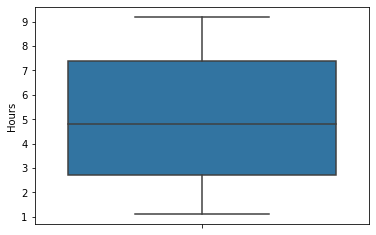

In [7]:
sns.boxplot(y='Hours',data=df)

<AxesSubplot:ylabel='Scores'>

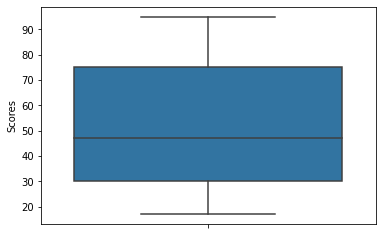

In [8]:
sns.boxplot(y='Scores',data=df)

### Missing Value

In [9]:
# Do we have NA's in data
df.isna().sum()

Hours     0
Scores    0
dtype: int64

### Plotting The Data

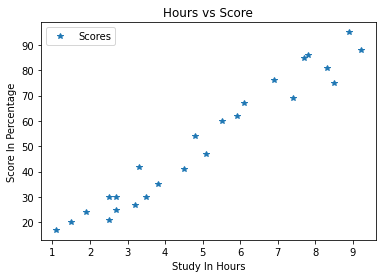

In [10]:
df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Score')  
plt.xlabel('Study In Hours')  
plt.ylabel('Score In Percentage')  
plt.show()

#### Correlation Matrix

In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

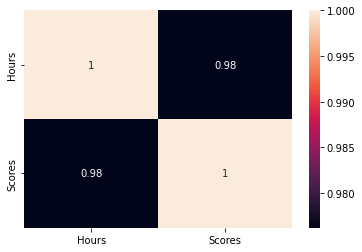

In [12]:
sns.heatmap(df.corr(),annot = True)

### Preparation of The Data

In [13]:
X=df[['Hours']].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
Y=df[['Scores']].values
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

### Splitting The Data In Train And Test

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

### Train The Algorithm

In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression()

### Plot The Line of Regression

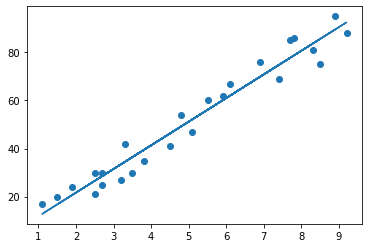

In [18]:
line = regressor.coef_* X + regressor.intercept_

plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Making of The Predictions

In [19]:

Y_pred = regressor.predict(X_test)
Y_pred

array([[28.54512294],
       [39.36411177],
       [34.44638957],
       [60.01854497],
       [16.74258969]])

### Comparing The Actual Result With The Predicted Values

In [27]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()}) 
df 

,Actual,Predicted
0,25,28.545123
1,35,39.364112
2,42,34.446390
3,62,60.018545
4,20,16.742590


In [28]:
print("Training Score:",regressor.score(X_train,Y_train))
print("Test Score:",regressor.score(X_test,Y_test))

Training Score: 0.9519568836485192
Test Score: 0.9050356232459791


In [29]:
Hours = 9.25
test = np.array([Hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [92.96728365]


### Evaluating The Model

In [30]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 4.140342096254413
Mean Squared Error: 20.641456931253995
Root Mean Squared Error: 4.543287018366107
R-2: 0.9050356232459791


* R-2 gives the score of model fit and in this case we have R-2 = 0.9050356232459791 which is actually a great score for this model.

### Conclusion

### Thank You